In [2]:
import pandas as pd

# Load your dataset
df = pd.read_csv("generated_manufacturing_cost_dataset.csv")

# Preview data
df.head()
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Production_Volume     200 non-null    int64  
 1   Energy_Usage          200 non-null    float64
 2   Raw_Material_Quality  200 non-null    float64
 3   Waste_Rate            200 non-null    float64
 4   Machine_Speed         200 non-null    float64
 5   Product_Quality       200 non-null    float64
 6   Production_Cost       200 non-null    float64
dtypes: float64(6), int64(1)
memory usage: 11.1 KB


,Production_Volume,Energy_Usage,Raw_Material_Quality,Waste_Rate,Machine_Speed,Product_Quality,Production_Cost
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,559.480000,667.110736,0.801736,0.127376,101.431049,85.387591,159.451286
std,270.783582,137.574590,0.113340,0.053914,27.318227,9.208417,25.737857
min,101.000000,388.518802,0.605469,0.021458,51.220307,70.007126,106.696920
25%,316.750000,575.038180,0.704203,0.082719,79.251591,77.721978,138.837349
50%,568.500000,662.423975,0.797813,0.130812,101.381567,85.674307,160.091610
75%,806.250000,749.689868,0.896070,0.171438,126.674506,93.740369,178.861935
max,999.000000,1118.403334,0.998372,0.226590,148.872878,99.980605,228.945461


Correlation: 0.66


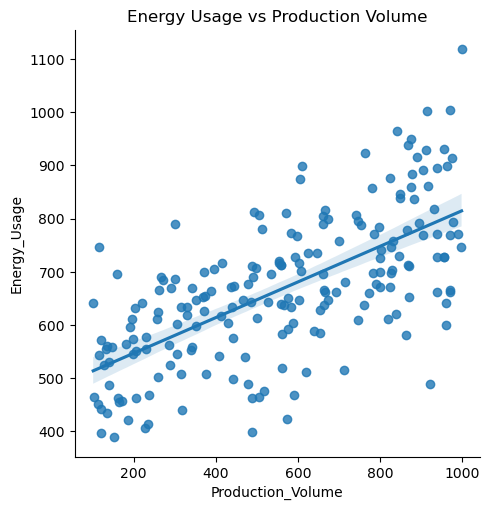

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

# Scatter plot with regression line
sns.lmplot(x='Production_Volume', y='Energy_Usage', data=df)
plt.title('Energy Usage vs Production Volume')

# Pearson correlation
corr = df['Production_Volume'].corr(df['Energy_Usage'])
print(f"Correlation: {corr:.2f}")


-0.22315761543293886


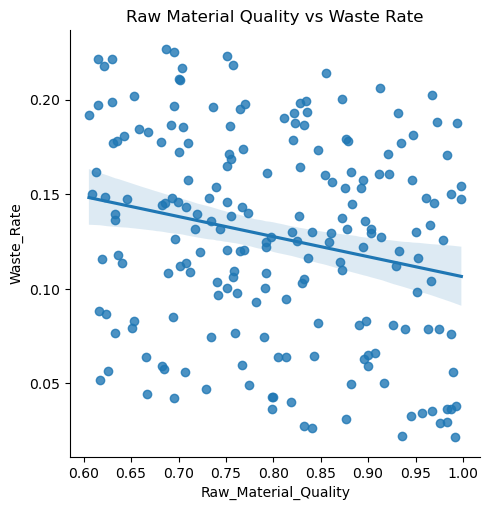

In [4]:
sns.lmplot(x='Raw_Material_Quality', y='Waste_Rate', data=df)
plt.title('Raw Material Quality vs Waste Rate')

# Correlation
print(df['Raw_Material_Quality'].corr(df['Waste_Rate']))


Text(0.5, 1.0, 'Machine Speed vs Production Cost')

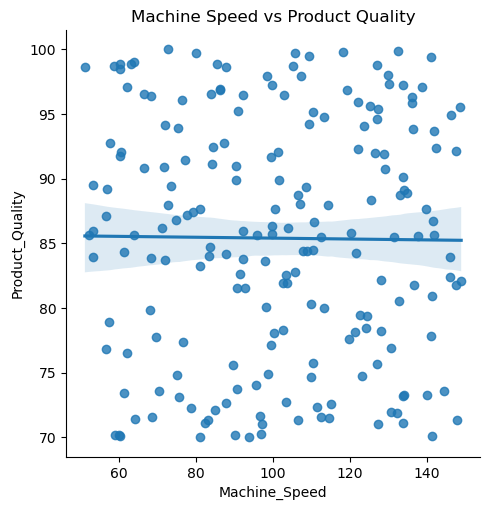

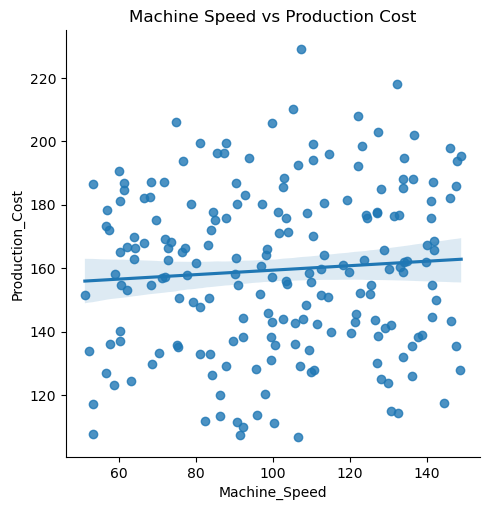

In [5]:
# Machine Speed vs Quality
sns.lmplot(x='Machine_Speed', y='Product_Quality', data=df)
plt.title('Machine Speed vs Product Quality')

# Machine Speed vs Cost
sns.lmplot(x='Machine_Speed', y='Production_Cost', data=df)
plt.title('Machine Speed vs Production Cost')


Text(0.5, 1.0, 'Correlation Matrix')

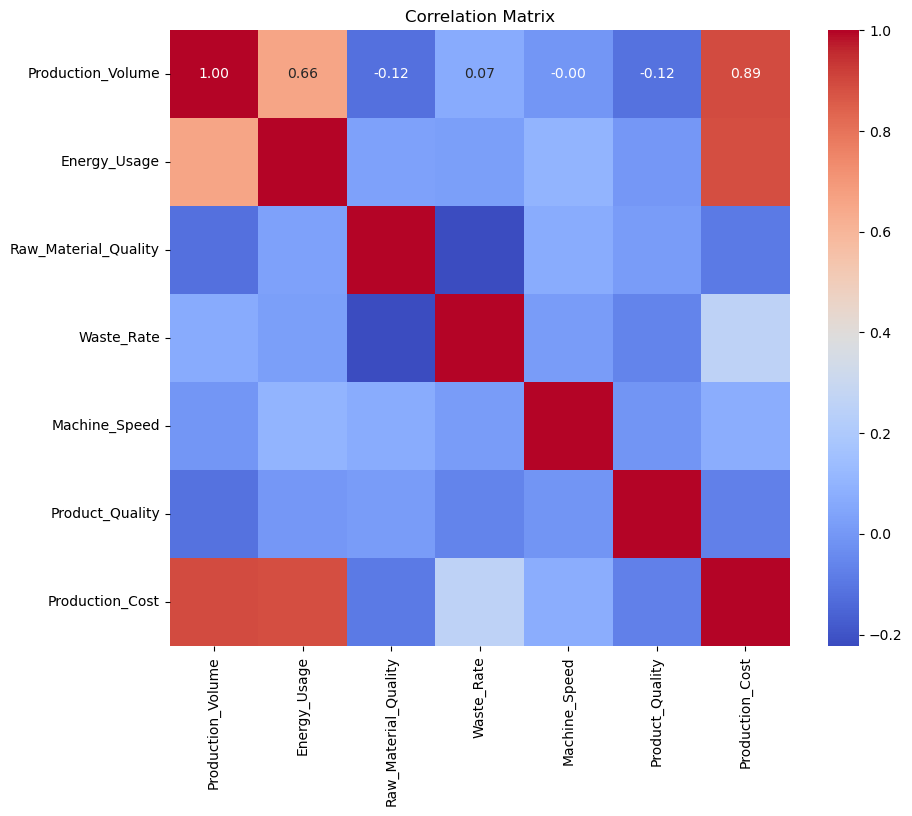

In [6]:
# Compute and plot correlation matrix
corr_matrix = df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')


In [7]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Features and target
X = df[['Production_Volume', 'Energy_Usage', 'Machine_Speed', 'Waste_Rate']]  # example features
y = df['Production_Cost']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation
mse = mean_squared_error(y_test, y_pred)
print(f'MSE: {mse:.2f}')

# Coefficients
pd.DataFrame({'Feature': X.columns, 'Coefficient': model.coef_})


MSE: 0.00


,Feature,Coefficient
0,Production_Volume,0.05
1,Energy_Usage,0.10
2,Machine_Speed,0.02
3,Waste_Rate,100.00
